<a href="https://colab.research.google.com/github/Hich11/ML-Prjects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML Projects/Loan Data Analytics Vidhya/train_loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


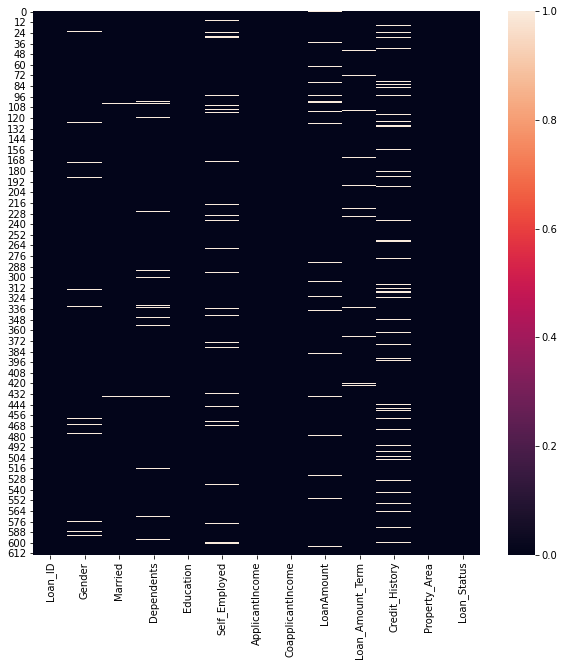

In [13]:
f=plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df.drop('Loan_ID',axis=1,inplace=True)

In [42]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
cat_feat= df.select_dtypes(include='object').columns

In [ ]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

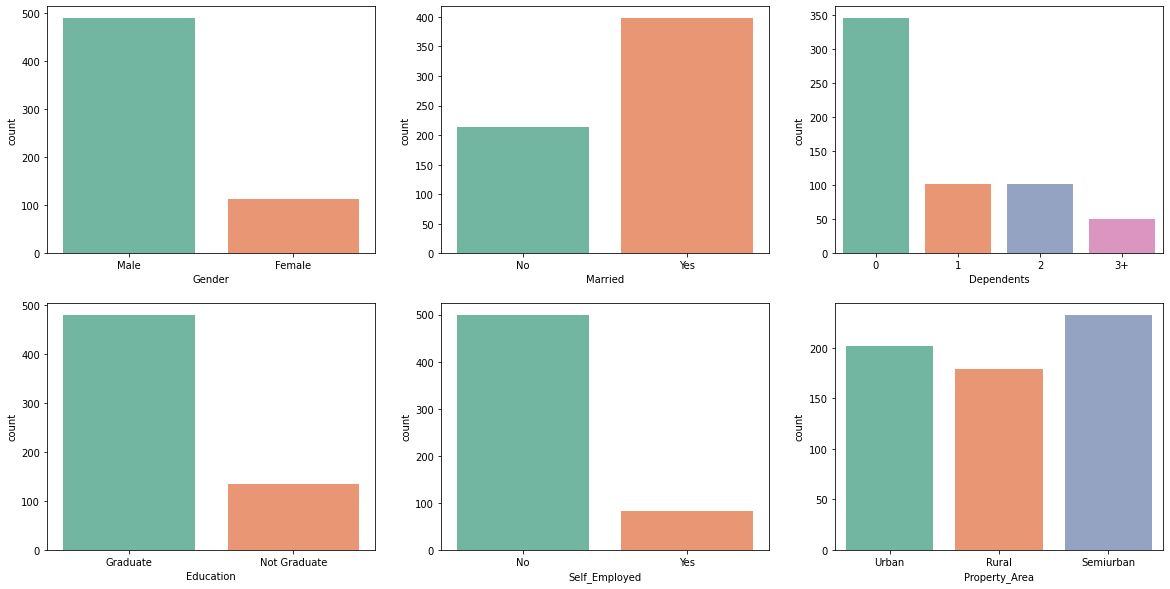

In [68]:
f,ax=plt.subplots(2,3,figsize=(20,10))
for col,subplot in zip(cat_feat[:-1],ax.flatten()):
    sns.countplot(x=df[col],data=df,palette='Set2',ax=subplot)

In [73]:
num_feat=df.select_dtypes(include=['float64'])

In [59]:
num_feat

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

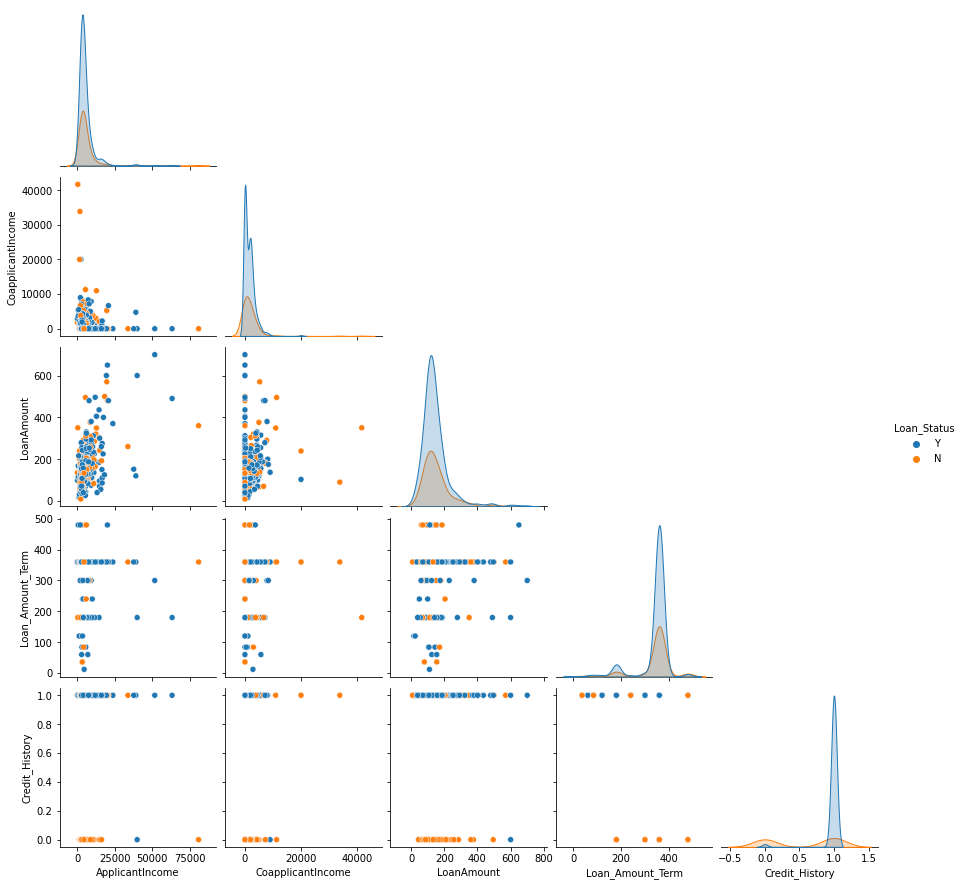

In [80]:
sns.pairplot(df,hue='Loan_Status',corner=True)

In [81]:
df.Gender=df.Gender.fillna('Male')

In [86]:
df.Married=df.Married.fillna('Yes')

In [87]:
df.Married.isnull().sum()

0

In [88]:
df.Dependents.isnull().sum()

15

In [93]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [92]:
df.Dependents=df.Dependents.replace(0,'0')

In [96]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [95]:
df.Self_Employed=df.Self_Employed.fillna('No')

In [100]:
df.LoanAmount.isnull().sum()
df.LoanAmount.mean()

146.41216216216216

In [101]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

In [106]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0)

In [107]:
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [110]:
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [109]:
df.Credit_History=df.Credit_History.fillna(1.0)

In [111]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [115]:
df=pd.get_dummies(df,cat_feat)

In [116]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1


In [114]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [117]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [119]:
df1=df.drop(['Gender_Female','Married_Yes', 'Dependents_3+', 'Education_Graduate','Self_Employed_No','Property_Area_Urban','Loan_Status_N'],axis=1)

In [120]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_No,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,1,1,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,0,0,1,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,1


In [121]:
df.shape

(614, 22)

In [122]:
df1.shape

(614, 15)

In [123]:
X=df1.iloc[:,:-1]

In [124]:
y=df1.iloc[:,-1]

In [126]:
X.shape

(614, 14)

In [128]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4474160550>,
      dtype=object)

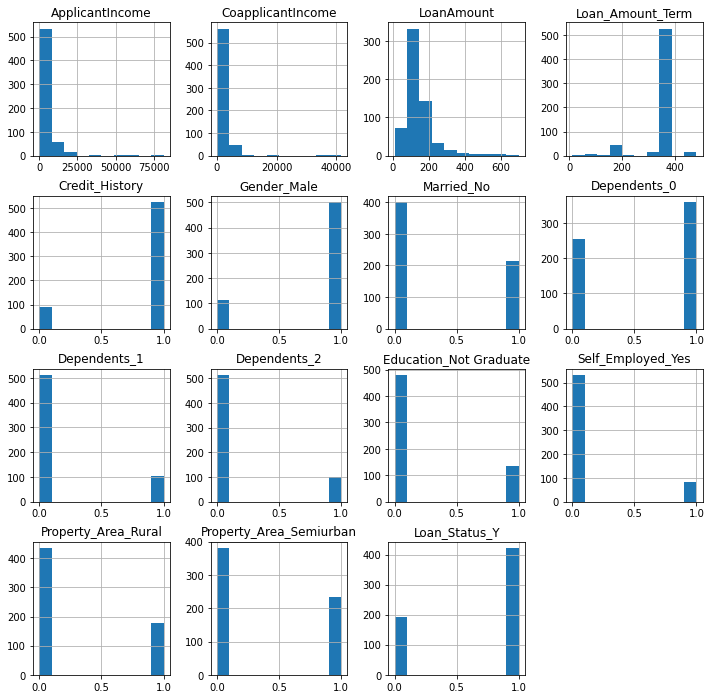

In [132]:
df1.hist(layout=(4,4),figsize=(12,12))

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [134]:
sc=StandardScaler()

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=777)

In [139]:
y_test.value_counts()

1    84
0    39
Name: Loan_Status_Y, dtype: int64

In [140]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [164]:
models=[]
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVC',SVC(kernel='rbf')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LogReg',LogisticRegressionCV()))
models.append(('RandForest',RandomForestClassifier()))
models.append(('Ada',AdaBoostClassifier()))
models.append(('XGB',GradientBoostingClassifier()))

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
results=[]
clf=[]
res_mean=[]
res_std=[]
for name,model in models:
  result_sc=cross_val_score(model,X_train_sc,y_train,scoring='accuracy',cv=5,verbose=2)
  results.append(result_sc)
  clf.append(name)
  res_mean.append(result_sc.mean())
  res_std.append(result_sc.std())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [167]:
results

[array([0.62626263, 0.70408163, 0.75510204, 0.7244898 , 0.67346939]),
 array([0.76767677, 0.81632653, 0.79591837, 0.79591837, 0.79591837]),
 array([0.72727273, 0.75510204, 0.71428571, 0.7755102 , 0.75510204]),
 array([0.76767677, 0.83673469, 0.80612245, 0.80612245, 0.79591837]),
 array([0.75757576, 0.79591837, 0.76530612, 0.78571429, 0.76530612]),
 array([0.76767677, 0.81632653, 0.7755102 , 0.7755102 , 0.75510204]),
 array([0.74747475, 0.82653061, 0.74489796, 0.79591837, 0.76530612])]

In [168]:
df_clf=pd.DataFrame({'clf_mean':res_mean,'clf_std':res_std},index=clf)

In [170]:
df_clf.sort_values(by='clf_mean',ascending=False)

,clf_mean,clf_std
LogReg,0.802515,0.022155
SVC,0.794352,0.015504
Ada,0.778025,0.020553
XGB,0.776026,0.031130
RandForest,0.773964,0.014412
KNN,0.745455,0.021870
DT,0.696681,0.044133


In [171]:
box=pd.DataFrame(results,index=clf)

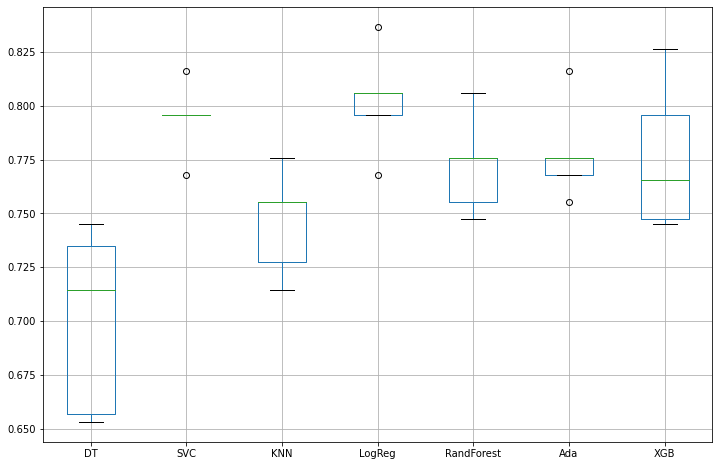

In [163]:
box.T.boxplot(figsize=(12,8))

In [172]:
box.head()

,0,1,2,3,4
DT,0.626263,0.704082,0.755102,0.724490,0.673469
SVC,0.767677,0.816327,0.795918,0.795918,0.795918
KNN,0.727273,0.755102,0.714286,0.775510,0.755102
LogReg,0.767677,0.836735,0.806122,0.806122,0.795918
RandForest,0.757576,0.795918,0.765306,0.785714,0.765306
